## **Import Neccesary Libraies**

In [1]:
! pip install wordcloud
! pip install textblob
! pip install gensim
#! pip install gensim==3.6.0
! pip install spacy
! pip install biterm
! pip install corextopic

# Start with loading all necessary libraries
import numpy as np
import pandas as pd
import sklearn
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.model_selection import GridSearchCV
import string
import seaborn as sns
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
import gensim
from gensim import corpora
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from sklearn.feature_extraction.text import TfidfVectorizer
from textblob import TextBlob
from collections import Counter
from itertools import chain
import pprint
from pprint import pprint

from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = "all"

#pd.set_option('display.max_colwidth', None)
# libraries for visualization
! pip install pyLDAvis
import pyLDAvis
import pyLDAvis.gensim_models 
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt
%matplotlib inline

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 79 kB 3.4 MB/s 
  Created wheel for biterm: filename=biterm-0.1.5-cp37-cp37m-linux_x86_64.whl size=195874 sha256=72ad144ec5222d4bee416972548f9ba7484687b5c49646de51941292db9c76ba
  Stored in directory: /root/.cache/pip/wheels/35/45/73/c4a79327f13728b195c12f35aa9331f897e37786f8e446cb09
Successfully built biterm
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.7 MB 5.3 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=de48b110badb8f72b178859d58fd36fd1d0df1f00e3ff3ec1271e0755a1d6eba
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1310 sha256=1658399822ae42f4df62014487e85ba6432f443e22de9f1f04adcaba9f7873e3
  Stored in directory: /root/.cache/pip/wheels/46/ef/c3/157e41f5ee1372d1be90b09f74f82b10e391eaacca8f22d33e
Successfully built pyLDAvis sklearn


/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable


In [2]:
import warnings
warnings.filterwarnings('ignore')

## **Read Preprosecced Pickle and Group by** 

In [5]:
df = pd.read_pickle('pre-processed (10).pkl')
df.head()

,username,id,date,tweet,retweets,likes,mentions,tags,tweet_clean,tweet_tokens,tweet_tokens_lem,tweet_new
0,@Benioff,1.520000e+18,4/30/2022 6:44,"RT @YoshikiOfficial: Beautiful place, Marc! \n...",457.0,0.0,"[Benioff, Sa, RahmEmanuel, YoshikiOfficial, US...",[Ambassador],"RT : Beautiful place, Marc! Had a great time w...","[beautiful, place, marc, great, time, great, c...","[beautiful, place, marc, great, time, great, c...","[yoshikiofficial, beautiful, place, marc, grea..."
1,@Benioff,1.520000e+18,4/30/2022 0:09,RT @MercedesAMG: A project which takes our par...,49.0,0.0,"[MercedesAMG, iamwill]",[],RT : A project which takes our partnership to ...,"[project, takes, partnership, next, level, sta...","[project, take, partnership, next, level, stay...","[mercedesamg, project, takes, partnership, nex..."
2,@Benioff,1.520000e+18,4/29/2022 7:32,RT @swbjoyce: Grateful to work with the best t...,27.0,0.0,"[swbjoyce, salesforce]",[TDX22],RT : Grateful to work with the best team in th...,"[grateful, work, best, team, biz, incredible, ...","[grateful, work, best, team, biz, incredible, ...","[swbjoyce, grateful, work, best, team, biz, in..."
3,@Benioff,1.520000e+18,4/29/2022 7:01,RT @btaylor: It was great to host many of the ...,10.0,0.0,[btaylor],[],RT : It was great to host many of the MVPs att...,"[great, host, many, mvps, attending, trailblaz...","[great, host, many, mvp, attending, trailblaze...","[btaylor, great, host, many, mvps, attending, ..."
4,@Benioff,1.520000e+18,4/29/2022 6:54,RT @btaylor: It was wonderful to reconnect wit...,9.0,0.0,"[btaylor, Salesforce]",[],RT : It was wonderful to reconnect with vetera...,"[wonderful, reconnect, veterans, today, inspir...","[wonderful, reconnect, veteran, today, inspiri...","[btaylor, wonderful, reconnect, veterans, sale..."


In [6]:
#Make string tweet_new column  
df['tweet_new_str'] = [','.join(map(str, l)) for l in df['tweet_new']]

In [7]:
df = df.groupby(by='username')

In [8]:
#Choose ceo you want to work 
ceo_username = '@MichaelDell'

In [9]:
df.get_group(ceo_username)

,username,id,date,tweet,retweets,likes,mentions,tags,tweet_clean,tweet_tokens,tweet_tokens_lem,tweet_new,tweet_new_str
16232,@MichaelDell,1.520000e+18,4/29/2022 10:37,https://t.co/4ghKbejoie https://t.co/aquQvGL6QR,4.0,114.0,[],[],,[],[],[],
16233,@MichaelDell,1.520000e+18,4/28/2022 18:23,🤠 https://t.co/4ghKbe1NqG,7.0,136.0,[],[],🤠,[],[],[],
16234,@MichaelDell,1.520000e+18,4/28/2022 18:22,Here are the similarities and differences betw...,1163.0,19662.0,"[Dell, Twitter, elonmusk]",[],Here are the similarities and differences betw...,"[similarities, differences, take, private, tak...","[similarity, difference, take, private, take, ...","[similarities, differences, elonmusk, take, pr...","similarities,differences,elonmusk,take,private..."
16235,@MichaelDell,1.520000e+18,4/22/2022 22:19,Making infrastructure available for our custom...,8.0,53.0,[DellTech],[],Making infrastructure available for our custom...,"[making, infrastructure, available, customers,...","[making, infrastructure, available, customer, ...","[making, infrastructure, available, customers,...","making,infrastructure,available,customers,solu..."
16236,@MichaelDell,1.520000e+18,4/22/2022 21:44,Circular design isn't the only thing we're doi...,5.0,60.0,[DellTech],[EarthDay],Circular design isn't the only thing we're doi...,"[circular, design, thing, drive, positive, imp...","[circular, design, thing, drive, positive, imp...","[circular, design, thing, delltech, drive, pos...","circular,design,thing,delltech,drive,positive,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19415,@MichaelDell,4.500000e+17,3/28/2014 19:22,RT @Inc: .@MichaelDell on why cybersecurity is...,43.0,0.0,[Inc],[],RT : .@MichaelDell on why cybersecurity is the...,"[michaeldell, cybersecurity, 1, u, business, r...","[michaeldell, cybersecurity, 1, u, business, r...","[inc, michaeldell, cybersecurity, 1, u, busine...","inc,michaeldell,cybersecurity,1,u,business,risk"
19416,@MichaelDell,4.480000e+17,3/25/2014 2:58,RT @SiliconANGLE: Dell jumpstarts advanced ana...,11.0,0.0,[SiliconANGLE],[],RT : Dell jumpstarts advanced analytics strate...,"[dell, jumpstarts, advanced, analytics, strate...","[dell, jumpstart, advanced, analytics, strateg...","[siliconangle, dell, jumpstarts, advanced, ana...","siliconangle,dell,jumpstarts,advanced,analytic..."
19417,@MichaelDell,4.480000e+17,3/24/2014 17:24,A big @Dell welcome to the @StatSoft team! We’...,44.0,10.0,"[Dell, StatSoft]",[],A big welcome to the team! We’re very excited ...,"[big, welcome, team, excited, welcome, family]","[big, welcome, team, excited, welcome, family]","[big, dell, welcome, statsoft, team, excited, ...","big,dell,welcome,statsoft,team,excited,welcome..."
19418,@MichaelDell,4.480000e+17,3/24/2014 16:28,RT @JoannMoretti: More on the acquisition of @...,9.0,0.0,"[JoannMoretti, StatSoft, matthewwolken]",[],RT : More on the acquisition of fr Congrats Ma...,"[acquisition, fr, congrats, matt, information,...","[acquisition, fr, congrats, matt, information,...","[joannmoretti, acquisition, statsoft, fr, matt...","joannmoretti,acquisition,statsoft,fr,matthewwo..."


## **Latent Dirichlet Allocation (LDA)**

In [10]:
reviews=[r.split() for r in df.get_group(ceo_username)['tweet_new_str']]

dictionary = corpora.Dictionary(reviews)

# Create Bag-of-words representation of the documents
bow_corpus = [dictionary.doc2bow(rev) for rev in reviews]

print('Number of unique tokens: %d' % len(dictionary))
print('Number of documents: %d' % len(bow_corpus))

Number of unique tokens: 3102
Number of documents: 3188


### **U_mass coherence**

In [11]:
from gensim.models import CoherenceModel
# Compute Coherence Score
from tqdm import tqdm
coherenceList_cv=[]
num_topics_list = [3,5, 8,10,15]
for num_topics in tqdm(num_topics_list):
    lda_model = gensim.models.LdaMulticore(corpus=bow_corpus,
                                       alpha=0.5, 
                                       id2word=dictionary,
                                       num_topics=num_topics, 
                                       random_state=100,
                                       chunksize=10000,
                                       passes=30,
                                       workers=4
                                       #per_word_topics=True
                                      )
    texts = [[dictionary[word_id] for word_id, freq in doc] for doc in bow_corpus]
    coherence_model_lda = CoherenceModel(model=lda_model, texts=texts, coherence='u_mass')
    coherence_lda = coherence_model_lda.get_coherence()
    coherenceList_cv.append(coherence_lda)
print('\nCoherence Score: ', coherence_lda)

100%|██████████| 5/5 [02:11<00:00, 26.34s/it]


Coherence Score:  -19.682641717533162


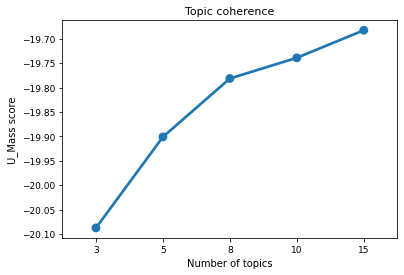

In [ ]:
plotData = pd.DataFrame({'Number of topics':num_topics_list,
                         'Coherence score_cv':coherenceList_cv})
# f,ax = plt.subplots(figsize=(6,4))
# sns.set_style("darkgrid")
ax = sns.pointplot(x='Number of topics',y= 'Coherence score_cv',data=plotData)
ax.set_xlabel('Number of topics', fontsize=10)
ax.set_ylabel('U_Mass score', fontsize=10)
ax.tick_params(axis='both', which='major', labelsize=9)
plt.title('Topic coherence', fontsize=11)
plt.savefig('coherence_umass.png', dpi=300);

### **C_v coherence**

In [ ]:
from gensim.models import CoherenceModel
# Compute Coherence Score
from tqdm import tqdm
coherenceList_cv=[]
num_topics_list = [3,5, 8,10,15]
for num_topics in tqdm(num_topics_list):
    lda_model = gensim.models.LdaMulticore(corpus=bow_corpus,
                                       alpha=0.5, 
                                       id2word=dictionary,
                                       num_topics=num_topics, 
                                       random_state=100,
                                       chunksize=10000,
                                       passes=30,
                                       workers=4
                                       #per_word_topics=True
                                      )
    texts = [[dictionary[word_id] for word_id, freq in doc] for doc in bow_corpus]
    coherence_model_lda = CoherenceModel(model=lda_model, texts=texts, coherence='c_v')
    coherence_lda = coherence_model_lda.get_coherence()
    coherenceList_cv.append(coherence_lda)
print('\nCoherence Score: ', coherence_lda)

100%|██████████| 5/5 [02:04<00:00, 24.98s/it]


Coherence Score:  0.8255203337544508


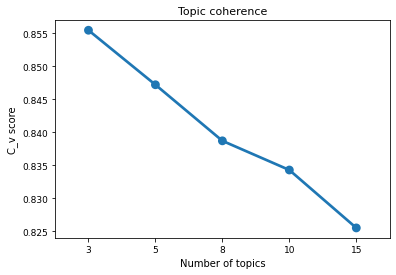

In [ ]:
plotData = pd.DataFrame({'Number of topics':num_topics_list,
                         'Coherence score_cv':coherenceList_cv})
# f,ax = plt.subplots(figsize=(6,4))
# sns.set_style("darkgrid")
ax = sns.pointplot(x='Number of topics',y= 'Coherence score_cv',data=plotData)
ax.set_xlabel('Number of topics', fontsize=10)
ax.set_ylabel('C_v score', fontsize=10)
ax.tick_params(axis='both', which='major', labelsize=9)
plt.title('Topic coherence', fontsize=11)
plt.savefig('coherence_cv.png', dpi=300);

## **LDA with Bigrams**

In [12]:
review_1 = [r.split() for r in df.get_group(ceo_username)['tweet_new_str']]


In [13]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(reviews, min_count=1, threshold=2) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[review_1], threshold=2)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[review_1[30]]])

['big,thanks,14,000,customers,deployed,nearly,200k,nodes,since,vxrail,introduced,6,years,ago']


In [14]:
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [15]:
!python3 -m spacy download en_core_web_sm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 12.8 MB 5.3 MB/s 
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [16]:
# Remove Stop Words
#data_words_nostops = remove_stopwords(review_1)
import en_core_web_sm

# Form Bigrams
data_words_bigrams = make_bigrams(review_1)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
import spacy
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:1])

[[]]


In [17]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

### **Coherence_cv**

In [18]:
from tqdm import tqdm
coherenceList_cv=[]
num_topics_list = [3,5,10,15,18]
for num_topics in tqdm(num_topics_list):
    lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=num_topics, 
                                           random_state=102,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)
    texts = [[id2word[word_id] for word_id, freq in doc] for doc in corpus]
    coherence_model_lda = CoherenceModel(model=lda_model, texts=texts, coherence='c_v')
    coherence_lda = coherence_model_lda.get_coherence()
    coherenceList_cv.append(coherence_lda)
print('\nCoherence Score: ', coherence_lda)

100%|██████████| 5/5 [00:40<00:00,  8.10s/it]


Coherence Score:  0.5862981801227636


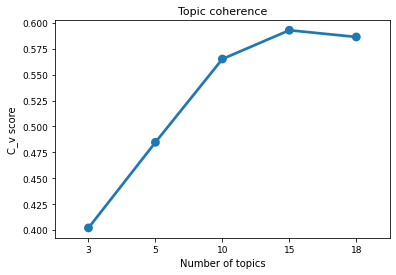

In [19]:
plotData = pd.DataFrame({'Number of topics':num_topics_list,
                         'Coherence score_cv':coherenceList_cv})
# f,ax = plt.subplots(figsize=(6,4))
#sns.set_style("darkgrid")
ax = sns.pointplot(x='Number of topics',y= 'Coherence score_cv',data=plotData)
ax.set_xlabel('Number of topics', fontsize=10)
ax.set_ylabel('C_v score', fontsize=10)
ax.tick_params(axis='both', which='major', labelsize=9)
plt.title('Topic coherence', fontsize=11)
plt.savefig('coherence_bigram.png', dpi=300);

### **U_mass**

In [20]:
from tqdm import tqdm
coherenceList_cv=[]
num_topics_list = [3,5,10,15,18]
for num_topics in tqdm(num_topics_list):
    lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=num_topics, 
                                           random_state=102,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)
    texts = [[id2word[word_id] for word_id, freq in doc] for doc in corpus]
    coherence_model_lda = CoherenceModel(model=lda_model, texts=texts, coherence='u_mass')
    coherence_lda = coherence_model_lda.get_coherence()
    coherenceList_cv.append(coherence_lda)
print('\nCoherence Score: ', coherence_lda)

100%|██████████| 5/5 [00:32<00:00,  6.60s/it]


Coherence Score:  -17.416102457775256


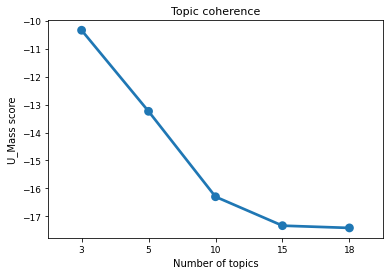

In [21]:
plotData = pd.DataFrame({'Number of topics':num_topics_list,
                         'Coherence score_cv':coherenceList_cv})
# f,ax = plt.subplots(figsize=(6,4))
#sns.set_style("darkgrid")
ax = sns.pointplot(x='Number of topics',y= 'Coherence score_cv',data=plotData)
ax.set_xlabel('Number of topics', fontsize=10)
ax.set_ylabel('U_Mass score', fontsize=10)
ax.tick_params(axis='both', which='major', labelsize=9)
plt.title('Topic coherence', fontsize=11)
plt.savefig('coherence_bigram_umass.png', dpi=300);

## **Latent Semantic Indexing (LSI)**

###**U_mass**

In [ ]:
reviews=[r.split() for r in df.get_group(ceo_username)['tweet_new_str']]

dictionary = corpora.Dictionary(reviews)

# Create Bag-of-words representation of the documents
bow_corpus = [dictionary.doc2bow(rev) for rev in reviews]

print('Number of unique tokens: %d' % len(dictionary))
print('Number of documents: %d' % len(bow_corpus))

Number of unique tokens: 3102
Number of documents: 3188


In [ ]:
from gensim.models import CoherenceModel
from gensim.models import LsiModel

# Compute Coherence Score
from tqdm import tqdm
coherenceList_u_mass=[]
num_topics_list = [3,5, 8,10,15,20]
for num_topics in tqdm(num_topics_list):
    lsi_model = gensim.models.LsiModel(corpus=bow_corpus,
                                       #alpha=0.5, 
                                       id2word=dictionary,
                                       num_topics=num_topics, 
                                       #random_state=100,
                                       chunksize=10000,
                                       ##passes=30,
                                       #workers=4
                                       #per_word_topics=True
                                      )
    texts = [[dictionary[word_id] for word_id, freq in doc] for doc in bow_corpus]
    coherence_model_lsi = CoherenceModel(model=lsi_model, texts=texts, coherence='u_mass')
    coherence_lsi = coherence_model_lsi.get_coherence()
    coherenceList_u_mass.append(coherence_lsi)
print('\nCoherence Score: ', coherence_lsi)

100%|██████████| 6/6 [00:01<00:00,  3.64it/s]


Coherence Score:  -20.025448576541933


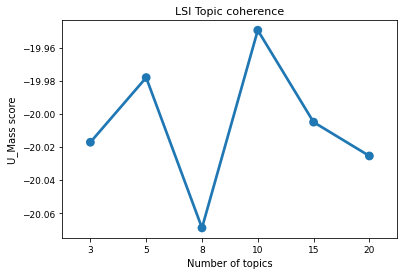

In [ ]:
plotData = pd.DataFrame({'Number of topics':num_topics_list,
                         'Coherence score_u_mass':coherenceList_u_mass})
# f,ax = plt.subplots(figsize=(6,4))
# sns.set_style("darkgrid")
ax = sns.pointplot(x='Number of topics',y= 'Coherence score_u_mass',data=plotData)
ax.set_xlabel('Number of topics', fontsize=10)
ax.set_ylabel('U_Mass score', fontsize=10)
ax.tick_params(axis='both', which='major', labelsize=9)
plt.title('LSI Topic coherence', fontsize=11)
plt.savefig('LSI_coherence_umass.png', dpi=300);

###**Coherence_cv**

In [ ]:
reviews=[r.split() for r in df.get_group(ceo_username)['tweet_new_str']]

dictionary = corpora.Dictionary(reviews)

# Create Bag-of-words representation of the documents
bow_corpus = [dictionary.doc2bow(rev) for rev in reviews]

print('Number of unique tokens: %d' % len(dictionary))
print('Number of documents: %d' % len(bow_corpus))

Number of unique tokens: 3102
Number of documents: 3188


In [ ]:
#This code is from https://github.com/RaRe-Technologies/gensim/issues/3040 to solve coherence== nan value 
import logging
            
import numpy as np
from gensim.topic_coherence import direct_confirmation_measure
            
log = logging.getLogger(__name__)
            
ADD_VALUE = 1


def custom_log_ratio_measure(segmented_topics, accumulator, normalize=False, with_std=False, with_support=False):
    topic_coherences = []
    num_docs = float(accumulator.num_docs)
    for s_i in segmented_topics:
        segment_sims = []
        for w_prime, w_star in s_i:
            w_prime_count = accumulator[w_prime]
            w_star_count = accumulator[w_star]
            co_occur_count = accumulator[w_prime, w_star]
                
            if normalize:
               # For normalized log ratio measure
               numerator = custom_log_ratio_measure([[(w_prime, w_star)]], accumulator)[0]
               co_doc_prob = co_occur_count / num_docs
               m_lr_i = numerator / (-np.log(co_doc_prob + direct_confirmation_measure.EPSILON))
            else:
               # For log ratio measure without normalization
               ### _custom: Added the following 6 lines, to prevent a division by zero error.
               if w_star_count == 0:
                  log.info(f"w_star_count of {w_star} == 0. Adding {ADD_VALUE} to the count to prevent error. ")
                  w_star_count += ADD_VALUE
               if w_prime_count == 0:
                  log.info(f"w_prime_count of {w_prime} == 0. Adding {ADD_VALUE} to the count to prevent error. ")
                  w_prime_count += ADD_VALUE
               numerator = (co_occur_count / num_docs) + direct_confirmation_measure.EPSILON
               denominator = (w_prime_count / num_docs) * (w_star_count / num_docs)
               m_lr_i = np.log(numerator / denominator)
                
               segment_sims.append(m_lr_i)
                
               topic_coherences.append(direct_confirmation_measure.aggregate_segment_sims(segment_sims, with_std, with_support))
                
    return topic_coherences
      

In [ ]:
#This code is from https://github.com/RaRe-Technologies/gensim/issues/3040 to solve coherence== nan value 

from gensim.topic_coherence import direct_confirmation_measure
#from my_custom_module import custom_log_ratio_measure
                
direct_confirmation_measure.log_ratio_measure = custom_log_ratio_measure

In [ ]:
from gensim.models import CoherenceModel
from gensim.models import LsiModel
texts = df.get_group(ceo_username)['tweet_new']
# Compute Coherence Score
from tqdm import tqdm
coherenceList_cv=[]
num_topics_list = [3,5, 8,15,20]
for num_topics in tqdm(num_topics_list):
    lsi_model = gensim.models.LsiModel(corpus=bow_corpus,
                                       #alpha=0.5, 
                                       id2word=dictionary,
                                       num_topics=num_topics, 
                                       #random_state=100,
                                       chunksize=10000,
                                       ##passes=30,
                                       #workers=4
                                       #per_word_topics=True
                                      )
    #texts = [[lambda x: x in dictionary.values() for t in texts] for doc in bow_corpus]
    
    #texts = [[lambda word_id: word_id in dictionary[word_id] for word_id in bow_corpus]]
    texts = [[lambda word_id: word_id in dictionary[word_id] for word_id in bow_corpus]]

        
    texts = [[dictionary[word_id] for word_id, freq in doc] for doc in bow_corpus]

    

    coherence_model_lsi = CoherenceModel(model=lsi_model, texts=texts, coherence='c_v')
    coherence_lsi = coherence_model_lsi.get_coherence()

    
    coherenceList_cv.append(coherence_lsi)
print('\nCoherence Score: ', coherence_lsi)
   

100%|██████████| 5/5 [00:06<00:00,  1.25s/it]


Coherence Score:  0.8312615743507876


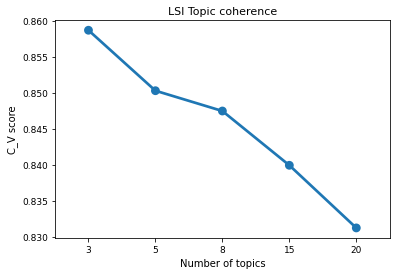

In [ ]:
plotData = pd.DataFrame({'Number of topics':num_topics_list,
                         'Coherence score_cv':coherenceList_cv})
# f,ax = plt.subplots(figsize=(6,4))
# sns.set_style("darkgrid")
ax = sns.pointplot(x='Number of topics',y= 'Coherence score_cv',data=plotData)
ax.set_xlabel('Number of topics', fontsize=10)
ax.set_ylabel('C_V score', fontsize=10)
ax.tick_params(axis='both', which='major', labelsize=9)
plt.title('LSI Topic coherence', fontsize=11)
plt.savefig('LSI_coherence_CV.png', dpi=300);

## **Applying Best Topic Model** 

In [22]:
reviews=[r.split() for r in df.get_group(ceo_username)['tweet_new_str']]

dictionary = corpora.Dictionary(reviews)

# Create Bag-of-words representation of the documents
bow_corpus = [dictionary.doc2bow(rev) for rev in reviews]

print('Number of unique tokens: %d' % len(dictionary))
print('Number of documents: %d' % len(bow_corpus))

Number of unique tokens: 3102
Number of documents: 3188


In [25]:
# supporting function
def compute_coherence_values(corpus, dictionary, k, a, b):
    
    lda_model = gensim.models.LdaMulticore(corpus=bow_corpus,
                                           id2word=dictionary,
                                           num_topics=k, 
                                           random_state=100,
                                           chunksize=10000,
                                           passes=30,
                                           alpha=a,
                                           eta=b,
                                           workers=4)
    texts = [[dictionary[word_id] for word_id, freq in doc] for doc in bow_corpus]
    coherence_model_lda = CoherenceModel(model=lda_model, texts=texts, coherence='c_v')
    
    return coherence_model_lda.get_coherence()

alpha=[0.3,0.5,0.7]
beta=[0.3,0.5,0.7]


model_results = {
                 #'Topics': [],
                 'Alpha': [],
                 'Beta': [],
                 'Coherence': []
                }

for a in alpha:
    for b in beta:
        cv = compute_coherence_values(corpus=bow_corpus, dictionary=dictionary, k= 3, a=a, b=b)
        #model_results['Topics'].append(k)
        model_results['Alpha'].append(a)
        model_results['Beta'].append(b)
        model_results['Coherence'].append(cv)
                    
pd.DataFrame(model_results).to_csv('lda_tuning_results_cv.csv', index=False)

In [29]:
# Creating the object for LDA model using gensim library

lda_model_3 = gensim.models.LdaMulticore(corpus=bow_corpus,
                                       alpha=0.5, 
                                       eta=0.7, 
                                       id2word=dictionary,
                                       num_topics=3, 
                                       random_state=100,
                                       chunksize=10000,
                                       passes=30,
                                       workers=4
                                       #per_word_topics=True
                                      )


pyLDAvis.enable_notebook()
vis_3 = pyLDAvis.gensim_models.prepare(lda_model_3, bow_corpus, dictionary)


pyLDAvis.save_html(vis_3, 'lda_3.html')

In [ ]:
display(pyLDAvis.display(vis_3))

In [38]:
from pprint import pprint
# Print the Keyword in the 5 topics
pprint(lda_model_3.print_topics())
doc_lda = lda_model_3[bow_corpus]

lda_df = lda_model_3.get_document_topics(bow_corpus,minimum_probability=0)
lda_df = pd.DataFrame(list(lda_df))

num_topics = lda_model_3.num_topics

lda_df.columns = ['Topic'+str(i) for i in range(num_topics)]
for i in range(len(lda_df.columns)):
    lda_df.iloc[:,i]=lda_df.iloc[:,i].apply(lambda x: x[1])
lda_df['Automated_topic_id'] =lda_df.apply(lambda x: np.argmax(x),axis=1)
lda_df.head()

[(0,
  '0.001*"davidblaine,joining,realize,digital,future,general,session,dellemcworld,pure,magic" '
  '+ 0.001*"andystephensmke,tweet,2,years,ago,28,years,30,years" + '
  '0.001*"looking,forward,seeing,delltechworld" + '
  '0.001*"jaketheman72,tweet,2,years,ago,28,years,30,years" + '
  '0.001*"posted,new,photo,facebook" + '
  '0.001*"front,page,today,wall,street,journal,dellemcstorage,dellemc,delltech" '
  '+ 0.001*"true,story" + 0.001*"dell30more" + '
  '0.001*"happy,5th,anniversary,everyone,delltech,vmware,secureworks,huge,thanks,cust" '
  '+ '
  '0.001*"thanks,usatoday,recognizing,dell,vmware,list,companies,best,managers,proud"'),
 (1,
  '0.002*"playnicebutwin" + 0.001*"see" + 0.001*"play,nice,win" + '
  '0.001*"dellsecureworks,growing,fast,hiring,around,world,support,additional,clients,start,career" '
  '+ 0.001*"delltechnologies,dellemc" + 0.001*"channel,become,dell,normal" + '
  '0.001*"ai,rocket,ship,data,fuel,iot,5g,trillion,connected,nodes,cambrian,explosion,opportunity,edge,

,Topic0,Topic1,Topic2,Automated_topic_id
0,0.333333,0.333333,0.333333,0
1,0.333333,0.333333,0.333333,0
2,0.220414,0.559492,0.220094,1
3,0.220609,0.220447,0.558944,2
4,0.560091,0.220039,0.219871,0


In [31]:
Topic_label = []
Topic_id = []
for row in lda_df['Automated_topic_id']:
    if row==0 :    Topic_label.append('Commercial') 
    elif row==1:   Topic_label.append('Dell Technology') 
    else:           Topic_label.append('Business') 


for row in lda_df['Automated_topic_id']:
    if row==0 :    Topic_id.append(0)
    elif row==1:    Topic_id.append(1)  
    else:           Topic_id.append(2)

In [32]:
Topic_df = lda_df.assign(Topic = Topic_label)

In [33]:
temp_df = df.get_group(ceo_username) 

In [34]:
final_df = temp_df.assign(Topic = Topic_label)
final_df = final_df.assign(Topic_Id = Topic_id)

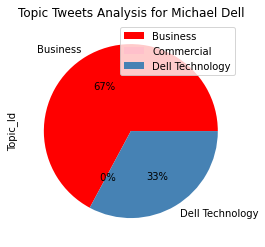

In [35]:
final_df.groupby(['Topic']).sum().plot(kind='pie', y='Topic_Id', autopct='%2.0f%%',
                                colors = ['red', 'pink', 'steelblue'],
                                title='Topic Tweets Analysis for Michael Dell')

In [36]:
#In this analysis we include both Topic 1 and Topic 2
business_news = final_df[final_df.Topic_Id != 0]

business_news

,username,id,date,tweet,retweets,likes,mentions,tags,tweet_clean,tweet_tokens,tweet_tokens_lem,tweet_new,tweet_new_str,Topic,Topic_Id
16234,@MichaelDell,1.520000e+18,4/28/2022 18:22,Here are the similarities and differences betw...,1163.0,19662.0,"[Dell, Twitter, elonmusk]",[],Here are the similarities and differences betw...,"[similarities, differences, take, private, tak...","[similarity, difference, take, private, take, ...","[similarities, differences, elonmusk, take, pr...","similarities,differences,elonmusk,take,private...",Dell Technology,1
16235,@MichaelDell,1.520000e+18,4/22/2022 22:19,Making infrastructure available for our custom...,8.0,53.0,[DellTech],[],Making infrastructure available for our custom...,"[making, infrastructure, available, customers,...","[making, infrastructure, available, customer, ...","[making, infrastructure, available, customers,...","making,infrastructure,available,customers,solu...",Business,2
16237,@MichaelDell,1.520000e+18,4/22/2022 21:16,At @DellTech we're committed to building a bet...,6.0,63.0,[DellTech],[],At we're committed to building a better world ...,"[committed, building, better, world, customers...","[committed, building, better, world, customer,...","[delltech, committed, building, better, world,...","delltech,committed,building,better,world,custo...",Business,2
16240,@MichaelDell,1.510000e+18,4/14/2022 0:17,Our @DellTechPartner teams have played a key r...,24.0,158.0,"[DellTechPartner, DellTech]",[],Our teams have played a key role in our contin...,"[teams, played, key, role, continued, success,...","[team, played, key, role, continued, success, ...","[delltechpartner, teams, played, key, role, co...","delltechpartner,teams,played,key,role,continue...",Dell Technology,1
16241,@MichaelDell,1.510000e+18,4/14/2022 0:09,RT @DellStorage: Get ready to unleash a modern...,60.0,0.0,[DellStorage],[DellTechWorld],RT : Get ready to unleash a modern storage exp...,"[get, ready, unleash, modern, storage, experie...","[get, ready, unleash, modern, storage, experie...","[dellstorage, get, ready, unleash, modern, sto...","dellstorage,get,ready,unleash,modern,storage,e...",Dell Technology,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19412,@MichaelDell,4.510000e+17,4/2/2014 3:35,RT @Dell: Dell Extends Collaboration with Goog...,10.0,0.0,[Dell],[Chromebox],RT : Dell Extends Collaboration with Google to...,"[dell, extends, collaboration, google, enable,...","[dell, extends, collaboration, google, enable,...","[dell, dell, extends, collaboration, google, e...","dell,dell,extends,collaboration,google,enable,...",Business,2
19413,@MichaelDell,4.510000e+17,4/2/2014 3:34,"RT @Dell: .@Oracle @OracleHCM extends, expands...",6.0,0.0,"[Dell, Boomi, OracleHCM]",[iPaaS],"RT : .@Oracle extends, expands relationship wi...","[oracle, extends, expands, relationship, dell]","[oracle, extends, expands, relationship, dell]","[dell, oracle, oraclehcm, extends, expands, re...","dell,oracle,oraclehcm,extends,expands,relation...",Dell Technology,1
19415,@MichaelDell,4.500000e+17,3/28/2014 19:22,RT @Inc: .@MichaelDell on why cybersecurity is...,43.0,0.0,[Inc],[],RT : .@MichaelDell on why cybersecurity is the...,"[michaeldell, cybersecurity, 1, u, business, r...","[michaeldell, cybersecurity, 1, u, business, r...","[inc, michaeldell, cybersecurity, 1, u, busine...","inc,michaeldell,cybersecurity,1,u,business,risk",Dell Technology,1
19417,@MichaelDell,4.480000e+17,3/24/2014 17:24,A big @Dell welcome to the @StatSoft team! We’...,44.0,10.0,"[Dell, StatSoft]",[],A big welcome to the team! We’re very excited ...,"[big, welcome, team, excited, welcome, family]","[big, welcome, team, excited, welcome, family]","[big, dell, welcome, statsoft, team, excited, ...","big,dell,welcome,statsoft,team,excited,welcome...",Dell Technology,1


In [ ]:
business_news.to_pickle('business_tweets.pkl')